# **Generative Adversarial Networks (GANS)**

Generative -> Üretken

Adversarial -> zıtlık, karşıtlık, çekişme

Üretken çekişmeli ağlar demektir. Birden fazla ağ vardır.

İki ağ birbiri arasında çekişme içerisindedir.

GANs, eğitim seti ile aynı istatistiklere sahip yeni veriler oluşturmayı öğrenen yapılardır.

GANs yapısınının yaratıcısı tarafından şu şekilde bir anlatım yapılmıştır:

Bir orijinal resim bulunmaktadır.

Bir de bir taklitçi tarafından oluşturulmuş sahte resim bulunmaktadır.

Gerçek resim ve sahte resim bir input olarak dedektife gelir.

Dedektif hangi resmin gerçek, hangi resmin sahte olduğunu bulmaya çalışırken, taklitçi de giderek orijinal resme yakın bir şekilde çizim yapmayı öğrenmektedir.

Böylece gerçek resim ile aynı istatistiğe sahip yeni verilerin oluşturulması öğrenilmiş olur.

GANs yapısında 2 network bulunur.

Birinci network **generator** olarak adlandırılır. Üretici ağdır.

İkinci network **discriminator** olarak adlandırılır. Ayırt edici ağdır.

Discriminator ağ bir classification yöntemidir.

Amaç orijinal datadan ayırt edilemeyen datalar üretmektir.

İlk başta oluşturulan görseller orijinal halinden uzak olacaktır. Zamanla orijinal görsellere benzetilmeye çalışılır.

Generator yapısı öğrenmede kullanılacak ilk yapıdır.

Discriminator, generator ile üretilen dataların orijinalliğe yakınlığını belirler. Burada da bir öğrenme söz konusudur.

GANs yapısında train setinden gerçek veri labellanarak (y=1) discriminator'a verilir.

Generator sahte datayı üretebilmek için random noise alır ve üretilen sahte data labellanarak (y=0) discriminator'a verilir.

Bu durumda discriminator'a 1 ve 0'dan oluşan iki class verilir ve bu iki class'ı ayırt etmeye/öğrenmeye çalışır.

Discriminator ayırt etmeye çalışırken bir loss oluşur. Çünkü ilk başta %100 doğru bir karar veremez.

Oluşan loss'a göre backward propagation yapılarak generator'daki weightler güncellenir.

Ancak discriminator'daki weightler güncellenmez. (d training = false) 

Eğer discriminator'daki weightler güncellenirse, discriminator kandırılamayacak şekilde eğitilmiş olur ve generator tarafından üretilen data hiçbir zaman real sample olarak sınıflandırılamaz.

Discriminator ve generator öğrenme olayını backward propagation ile gerçekleştirir. 

Zamanla generator daha gerçekçi sample'lar ürettiğinden, discriminator ayırt edemeyecektir.

Böylelikle train setinde bulunan real sample'a göre aynı istatistiklere sahip yeni verilerin oluşturulması öğrenilmiş olur. 

Generator daha gerçekçi datalar üretmeyi öğrenirken, discriminator generator tarafından üretilen dataları ve orijinal dataları öğrenerek bunları ayırt etmeyi çalışır. Bu yüzden generator ile discriminator arasında bir çekişme söz konusudur.

Generator ve discriminator arasında bir çekişme olduğundan adversarial networks denir.

In [ ]:
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")
print("Found GPU at: {}".format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


Keras kütüphanesinden mnist datası kullanılacaktır.

Mnist 0-9 arası classlardan oluşan bir datadır.

In [ ]:
x_train = (x_train.astype(np.float32)-127.5)/127.5

Train datasının türü float32'ye çevrilip, tüm değerler -1 ile 1 arasına sıkıştırılır.

In [ ]:
print(x_train.shape)

(60000, 28, 28)


60000 sample bulunmakta ve görseller 28x28 boyutundadır.

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
print(x_train.shape)

(60000, 784)


Pikseller reshape yapılarak düzleştirilir.

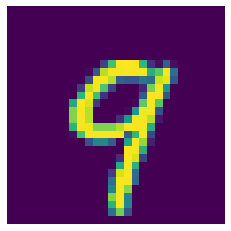

In [ ]:
plt.imshow(x_test[12])
plt.axis("off")
plt.show()

In [ ]:
#generator
def create_generator():
    
    generator = Sequential() #Sequential methodu ile layerlar sıralı bir şekilde generator variable'ına atanır.

    generator.add(Dense(units = 512, input_dim = 100)) #hidden layer
    generator.add(ReLU())
    
    generator.add(Dense(units = 512)) #hidden layer
    generator.add(ReLU())
    
    generator.add(Dense(units = 1024)) #hidden layer
    generator.add(ReLU())
    
    generator.add(Dense(units = 784, activation = "tanh")) #output layer
    
    generator.compile(loss = "binary_crossentropy",
                      optimizer = Adam(lr = 0.0001, beta_1 = 0.5))
    return generator

g = create_generator()
g.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 re_lu_1 (ReLU)              (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 re_lu_2 (ReLU)              (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               8

In [ ]:
#discriminator

def create_discriminator():
    discriminator = Sequential() 
    discriminator.add(Dense(units=1024,input_dim = 784)) #hidden layer
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(units=512)) #hidden layer
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(units=256)) #hidden layer
    discriminator.add(ReLU())
    
    discriminator.add(Dense(units=1, activation = "sigmoid")) #output layer
    
    discriminator.compile(loss = "binary_crossentropy",
                          optimizer= Adam(lr = 0.0001, beta_1=0.5))
    return discriminator

d = create_discriminator()
d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 re_lu_3 (ReLU)              (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 re_lu_4 (ReLU)              (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [ ]:
#gans
def create_gan(discriminator, generator):

    discriminator.trainable = False #discriminator train edilemez olmalıdır.

    gan_input = Input(shape=(100,))

    x = generator(gan_input) #generator modeli

    gan_output = discriminator(x) #generator datası discriminator'a girerek gan modelinin output'unu oluşturur. (real/fake)

    gan = Model(inputs = gan_input, outputs = gan_output)

    gan.compile(loss = "binary_crossentropy", optimizer="adam",metrics=["accuracy"])

    return gan
    
gan = create_gan(d,g)

gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 784)               1643280   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 3,103,505
Trainable params: 1,643,280
Non-trainable params: 1,460,225
_________________________________________________________________


In [ ]:
#train

epochs = 50
batch_size = 256

for e in range(epochs):
    for _ in range(batch_size):
        
        noise = np.random.normal(0,1, [batch_size,100]) #random noise oluşturulur
        
        generated_images = g.predict(noise) #random noise generator'a koyularak generated image oluşturulur.
        
        image_batch = x_train[np.random.randint(low = 0, high = x_train.shape[0],size = batch_size)] 
        #train datasından real image'ler random bir şekilde alınır.
        
        x = np.concatenate([image_batch, generated_images]) #real imageler ile generated image'ler birleştirilir.
        
        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 1 #y_discriminator label'ları ilk 256'sı True label, son 256'sı False label olarak sınıflandırılır.
                               #çünkü x'de image'ler birleştirilirken ilk 256'sı real image, son 256'sı generated image'dir.
        
        d.trainable = True
        d.train_on_batch(x,y_dis) #real image ve generated image discriminator'a koyulur.

        noise = np.random.normal(0,1,[batch_size,100]) #discriminator'ın eğitilmesi için yeni bir noise oluşturulur.
        
        y_gen = np.ones(batch_size) #generator real image'lere benzetmeye çalıştığı için True olarak labellanır.
        
        d.trainable = False
        
        gan.train_on_batch(noise, y_gen)
    print("epochs: ",e)

8/8 [==============================] - 0s 1ms/step
epochs:  0
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  1
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  2
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  3
8/8 [==============================] - 0s 2ms/step
epochs:  4


8/8 [==============================] - 0s 3ms/step
epochs:  5
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  6
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  7
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  8
8/8 [==============================] - 0s 2ms/step
epochs:  9


8/8 [==============================] - 0s 2ms/step
epochs:  10
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  11
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  12
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  13
8/8 [==============================] - 0s 2ms/step
epochs:  14


8/8 [==============================] - 0s 2ms/step
epochs:  15
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  16
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  17
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  18
8/8 [==============================] - 0s 2ms/step
epochs:  19


8/8 [==============================] - 0s 2ms/step
epochs:  20
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  21
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  22
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  23
8/8 [==============================] - 0s 2ms/step
epochs:  24


8/8 [==============================] - 0s 2ms/step
epochs:  25
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  26
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 3ms/step
epochs:  27
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  28
8/8 [==============================] - 0s 2ms/step
epochs:  29


8/8 [==============================] - 0s 2ms/step
epochs:  30
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  31
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  32
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  33
8/8 [==============================] - 0s 2ms/step
epochs:  34


8/8 [==============================] - 0s 3ms/step
epochs:  35
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  36
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  37
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  38
8/8 [==============================] - 0s 3ms/step
epochs:  39


8/8 [==============================] - 0s 2ms/step
epochs:  40
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  41
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  42
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  43
8/8 [==============================] - 0s 2ms/step
epochs:  44


8/8 [==============================] - 0s 3ms/step
epochs:  45
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  46
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  47
8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 2ms/step
epochs:  48
8/8 [==============================] - 0s 2ms/step
epochs:  49


In [ ]:
g.save_weights('gans_model.h5')  

In [ ]:
noise= np.random.normal(loc=0, scale=1, size=[100, 100]) #random bir noise oluşturulur.
generated_images = g.predict(noise) #random noise ile generated image'ler predict edilir.

4/4 [==============================] - 0s 4ms/step


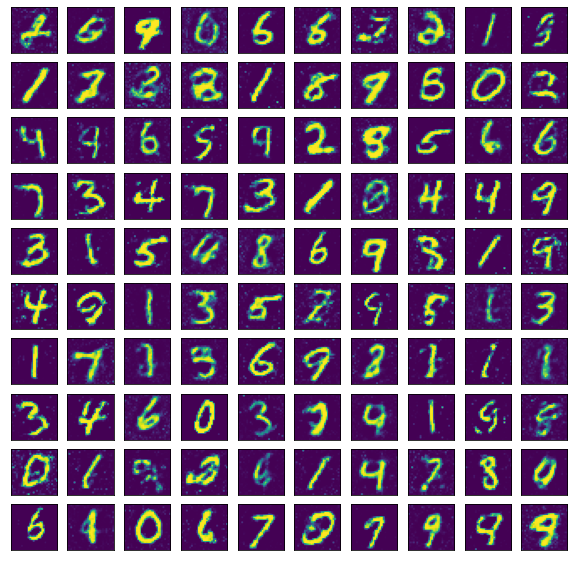

In [ ]:
#visualizing
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = [generated_images[i]]
    img = np.reshape(img, (28, 28))
    plt.imshow(img)
plt.show()

50 epoch ile gerçeğe çok yakın görseller elde edilmiştir.